In [1]:
import pandas as pd
import numpy as np
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
# Model Building

    #classifiers
from sklearn.linear_model import LogisticRegression

    #vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer

    #training features
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

    #performance measures
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer


In [4]:
#filter future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
# Exploratory Data Analysis (EDA)
train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [7]:
test.head()

,username,description
0,_.anju.u,I used to make up songs all the time just beca...
1,__.tickled_pink.__,cant win unless you learn how to lose||| From ...
2,_anugrahanair_,"you do not find the happy life, you make it ||..."
3,_charuzz_,"stop staring, it's our body womenempowerment ..."
4,_gaayu___,Freedom lies in being bold. ||| be somebody th...


In [8]:
print('Number of rows and columns in train data:{}' .format(train.shape))
print('Number of rows and columns in test data:{}' .format(test.shape))

Number of rows and columns in train data:(8675, 2)
Number of rows and columns in test data:(150, 2)


In [9]:
# Is there any missing data in any of the columns?
print("TRAINING DATASET: ")
train.isnull().sum()


TRAINING DATASET: 


type     0
posts    0
dtype: int64

In [10]:
print("TEST DATASET: ")
test.isnull().sum()

TEST DATASET: 


username       0
description    0
dtype: int64

In [11]:
# How many posts were written by each personality type?
type_sum = train.groupby(['type']).count()
type_sum.sort_values('posts', ascending=False, inplace=True)
type_sum

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


In [12]:
# How many total words were written by each personality type?
train['word_count'] = train['posts'].apply(lambda x: len(str(x).split(" ")))
word_count = train.groupby('type').sum()
word_count.sort_values('word_count', ascending=False, inplace=True)
word_count


,word_count
type,
INFP,2344092
INFJ,1933087
INTP,1606399
INTJ,1342152
ENFP,875068
ENTP,848096
ISTP,404603
ISFP,316137
ENTJ,290276


In [13]:
#drop word_count column
train = train.drop(['word_count'], axis=1)

In [14]:
# Create a binary column for each of the 4 dimension types
train['Mind'] = train['type'].map(lambda x: 'Extroverted' if x[0] == 'E' else 'Introverted')
train['Energy'] = train['type'].map(lambda x: 'Intuitive' if x[1] == 'N' else 'Sensing')
train['Nature'] = train['type'].map(lambda x: 'Thinking'  if x[2] == 'T' else 'Feeling')
train['Tactics'] = train['type'].map(lambda x: 'Judging'  if x[3] == 'J' else 'Perceiving')

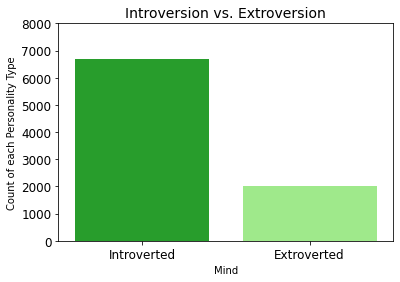

In [15]:
# Mind
# Countplot of the Introverted - Extroverted variable
IEcolors = sns.xkcd_palette(['green', 'light green'])
sns.set_palette(IEcolors)
sns.countplot(x='Mind', data=train, order=['Introverted', 'Extroverted'])
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Mind')
plt.ylabel('Count of each Personality Type')
plt.title('Introversion vs. Extroversion', fontsize=14)
plt.show()

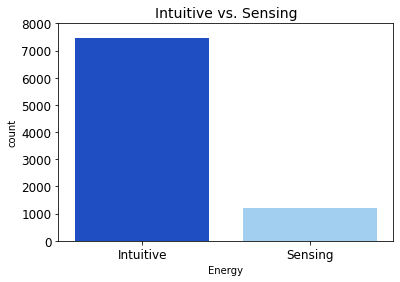

In [16]:
# Countplot of the Intuitive - Sensing variable
NScolors = sns.xkcd_palette(['blue', 'light blue'])
sns.set_palette(NScolors)
sns.countplot(x='Energy', data=train, order=['Intuitive', 'Sensing'])
plt.title('Intuitive vs. Sensing', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

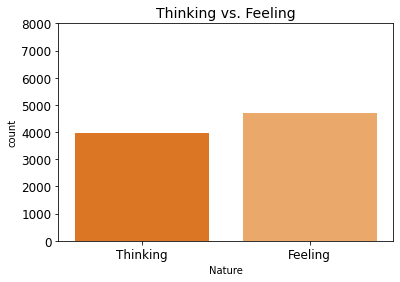

In [17]:
# Countplot of the Thinking - Feeling variable
TFcolors = sns.xkcd_palette(['orange', 'pale orange'])
sns.set_palette(TFcolors)
sns.countplot(x='Nature', data=train, order=['Thinking', 'Feeling'])
plt.title('Thinking vs. Feeling', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


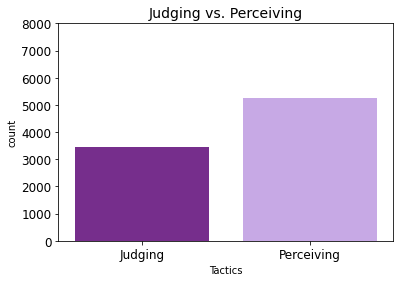

In [18]:
# Countplot of Judging - Perceiving
JPcolors = sns.xkcd_palette(['purple', 'lavender'])
sns.set_palette(JPcolors)
sns.countplot(x='Tactics', data=train, order=['Judging', 'Perceiving'])
plt.title('Judging vs. Perceiving', fontsize=14)
plt.ylim(0, 8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [19]:
# Removing delimeters
def remove_delimiters (post):
    new = post.replace('|||',' ')
    return ' '.join(new.split())

train['posts'] = train['posts'].apply(remove_delimiters)
test['description'] = test['description'].apply(remove_delimiters)

In [20]:
# Removing URLs
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'

#apply to train set
train['posts'] = train['posts'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#apply to test set
test['description'] = test['description'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [21]:
# Convert words to lowercase
train['posts'] = train['posts'].str.lower()

test['description'] = test['description'].str.lower()

In [22]:
# Remove punctuation and numbers
def remove_punctuation(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

train['posts'] = train['posts'].apply(remove_punctuation)

test['description'] = test['description'].apply(remove_punctuation)

In [23]:
train.head()

,type,posts,Mind,Energy,Nature,Tactics
0,INFJ,urlweb urlweb enfp and intj moments urlweb spo...,Introverted,Intuitive,Feeling,Judging
1,ENTP,im finding the lack of me in these posts very ...,Extroverted,Intuitive,Thinking,Perceiving
2,INTP,good one urlweb of course to which i say i kn...,Introverted,Intuitive,Thinking,Perceiving
3,INTJ,dear intp i enjoyed our conversation the other...,Introverted,Intuitive,Thinking,Judging
4,ENTJ,youre fired thats another silly misconception ...,Extroverted,Intuitive,Thinking,Judging


In [24]:
# Lemmatization

# Lematise posts
lemmatizer = WordNetLemmatizer()
train['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in train['posts']]
test['lemma'] = [' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])for text in test['description']]

In [25]:
# Are there any stopwords in the text?
#Check for stopwords train
stop = stopwords.words('english')
train['stopwords'] = train['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['lemma','stopwords']].head()

,lemma,stopwords
0,urlweb urlweb enfp and intj moment urlweb spor...,257
1,im finding the lack of me in these post very a...,587
2,good one urlweb of course to which i say i kn...,402
3,dear intp i enjoyed our conversation the other...,529
4,youre fired thats another silly misconception ...,495


In [26]:
#Check for stopwords test
stop = stopwords.words('english')
test['stopwords'] = test['lemma'].apply(lambda x: len([x for x in x.split() if x in stop]))
test[['lemma','stopwords']].head()

,lemma,stopwords
0,i used to make up song all the time just becau...,62
1,cant win unless you learn how to lose from the...,14
2,you do not find the happy life you make it som...,14
3,stop staring it our body womenempowerment gend...,13
4,freedom lie in being bold be somebody that nob...,10


In [27]:
#removing stop words
def remove_stop_words(word):
    if word not in stop:
        return word
    else:
        return ''

In [28]:
test['lemma_no_stop'] = [' '.join([remove_stop_words(word) for word in text.split(' ')])for text in test['lemma']]

In [29]:
test.head()

,username,description,lemma,stopwords,lemma_no_stop
0,_.anju.u,i used to make up songs all the time just beca...,i used to make up song all the time just becau...,62,used make song time wa fun also used...
1,__.tickled_pink.__,cant win unless you learn how to lose from the...,cant win unless you learn how to lose from the...,14,cant win unless learn lose theory interac...
2,_anugrahanair_,you do not find the happy life you make it som...,you do not find the happy life you make it som...,14,find happy life make sometimes better ...
3,_charuzz_,stop staring its our body womenempowerment gen...,stop staring it our body womenempowerment gend...,13,stop staring body womenempowerment genderequ...
4,_gaayu___,freedom lies in being bold be somebody that no...,freedom lie in being bold be somebody that nob...,10,freedom lie bold somebody nobady thought ...


In [30]:
# Model Building
#Create binary classes for each of the personality characteristics
train['E'] = train['type'].apply(lambda x: x[0] == 'E').astype('int')
train['N'] = train['type'].apply(lambda x: x[1] == 'N').astype('int')
train['T'] = train['type'].apply(lambda x: x[2] == 'T').astype('int')
train['J'] = train['type'].apply(lambda x: x[3] == 'J').astype('int')

In [31]:
train.head()

,type,posts,Mind,Energy,Nature,Tactics,lemma,stopwords,E,N,T,J
0,INFJ,urlweb urlweb enfp and intj moments urlweb spo...,Introverted,Intuitive,Feeling,Judging,urlweb urlweb enfp and intj moment urlweb spor...,257,0,1,0,1
1,ENTP,im finding the lack of me in these posts very ...,Extroverted,Intuitive,Thinking,Perceiving,im finding the lack of me in these post very a...,587,1,1,1,0
2,INTP,good one urlweb of course to which i say i kn...,Introverted,Intuitive,Thinking,Perceiving,good one urlweb of course to which i say i kn...,402,0,1,1,0
3,INTJ,dear intp i enjoyed our conversation the other...,Introverted,Intuitive,Thinking,Judging,dear intp i enjoyed our conversation the other...,529,0,1,1,1
4,ENTJ,youre fired thats another silly misconception ...,Extroverted,Intuitive,Thinking,Judging,youre fired thats another silly misconception ...,495,1,1,1,1


In [32]:
mind_df = train[['lemma','E']]
mind_df.head()

,lemma,E
0,urlweb urlweb enfp and intj moment urlweb spor...,0
1,im finding the lack of me in these post very a...,1
2,good one urlweb of course to which i say i kn...,0
3,dear intp i enjoyed our conversation the other...,0
4,youre fired thats another silly misconception ...,1


tf * idf 
term frequency = no of rep of words in a sent / no of words in a sent
inverse document frequency = no of sentences / no of sentences containing words

In [33]:
vect_mind = TfidfVectorizer(lowercase=True, 
                            stop_words='english', 
                            max_features=250,
                            min_df=4,
                            max_df=0.5
                           )
vect_mind


TfidfVectorizer(max_df=0.5, max_features=250, min_df=4, stop_words='english')

In [34]:
vect_mind.fit(mind_df['lemma'])     #train 
X_count_mind = vect_mind.transform(mind_df['lemma']) 
X_count_mind   


<8675x250 sparse matrix of type '<class 'numpy.float64'>'
	with 648008 stored elements in Compressed Sparse Row format>

In [35]:
X_count_mind.shape

(8675, 250)

In [36]:
vect_mind.get_feature_names()

['able',
 'absolutely',
 'act',
 'advice',
 'age',
 'ago',
 'agree',
 'answer',
 'arent',
 'ask',
 'away',
 'awesome',
 'bad',
 'based',
 'believe',
 'big',
 'bit',
 'book',
 'called',
 'came',
 'care',
 'case',
 'cause',
 'certain',
 'change',
 'character',
 'child',
 'class',
 'close',
 'college',
 'common',
 'completely',
 'consider',
 'conversation',
 'cool',
 'couple',
 'course',
 'crazy',
 'dad',
 'definitely',
 'depends',
 'description',
 'difference',
 'dream',
 'easy',
 'emotion',
 'emotional',
 'end',
 'enfj',
 'enfp',
 'enfps',
 'enjoy',
 'entj',
 'entp',
 'esfj',
 'esfp',
 'especially',
 'estp',
 'exactly',
 'example',
 'experience',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'favorite',
 'fe',
 'felt',
 'female',
 'fi',
 'figure',
 'fit',
 'forum',
 'fun',
 'function',
 'funny',
 'game',
 'general',
 'generally',
 'getting',
 'girl',
 'god',
 'great',
 'group',
 'guess',
 'haha',
 'hand',
 'happy',
 'hate',
 'havent',
 'having',
 'head',
 'hear',
 'heard',
 'heart',
 'h

In [37]:
X = X_count_mind
y = mind_df['E']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size =0.4,
                                                   random_state = 42)


In [38]:
def scoring_function_log_loss(y_test, y_pred_test):
    return log_loss(y_test, y_pred_test)

In [39]:
score_log_loss = make_scorer(scoring_function_log_loss, greater_is_better = False)

In [40]:
def tune_LogReg_model(X_train, y_train): 
    C_list = [0.001, 0.01, 0.1, 0.5, 0.75, 1, 5, 10, 25, 100]
    penalty_list = ['l1','l2']

    score = make_scorer(scoring_function_log_loss, greater_is_better = False)
    
    logreg = LogisticRegression()
    
    parameters = {'C':C_list,
                  'penalty': penalty_list}
    tune = GridSearchCV(logreg, parameters, scoring = score)
    tune.fit(X_train,y_train)
    
    return tune

In [41]:
best_mind_model = tune_LogReg_model(X_train, y_train)

c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Parthasarat

In [42]:
best_mind_model.best_params_

{'C': 25, 'penalty': 'l2'}

In [43]:
mind_model = LogisticRegression(C=best_mind_model.best_params_['C'], penalty = best_mind_model.best_params_['penalty'])
mind_model.fit(X_train, y_train)

LogisticRegression(C=25)

In [44]:
y_pred_train = mind_model.predict(X_train)

In [45]:
accuracy_score(y_train, y_pred_train)

0.8689721421709894

In [46]:
y_pred_test = mind_model.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred_test)

0.8538904899135447

In [48]:
confusion_matrix(y_train, y_pred_train)

array([[3805,  182],
       [ 500,  718]], dtype=int64)

In [49]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test,labels=[0,1])

array([[2528,  161],
       [ 346,  435]], dtype=int64)

In [50]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3987
           1       0.80      0.59      0.68      1218

    accuracy                           0.87      5205
   macro avg       0.84      0.77      0.80      5205
weighted avg       0.86      0.87      0.86      5205



In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2689
           1       0.73      0.56      0.63       781

    accuracy                           0.85      3470
   macro avg       0.80      0.75      0.77      3470
weighted avg       0.85      0.85      0.85      3470



In [52]:
log_loss(y_train, y_pred_train)

4.525569842086721

In [53]:
log_loss(y_test, y_pred_test)

5.046480797523336

In [54]:
mind_log_loss = cross_val_score(mind_model, X, y, scoring=score_log_loss,cv=4,)
print('Log Loss %2f' %(-1 * mind_log_loss.mean()))

mind_acc = cross_val_score(mind_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(mind_acc.mean()))

Log Loss 5.076336
Accuracy 0.853026


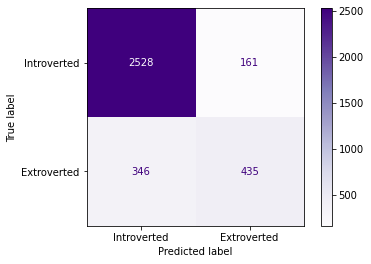

In [55]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
mind_model.fit(X_train, y_train)
plot_confusion_matrix(mind_model,X_test,y_test,cmap=plt.cm.Purples,values_format = '.5g', display_labels = ["Introverted","Extroverted"])
plt.show()

In [56]:
# Energy model
energy_df = train[['lemma','N']]

In [57]:
vect_energy = TfidfVectorizer(lowercase=True, 
                            stop_words='english', 
                            max_features=195,
                            min_df=4,
                            max_df=0.5
                           )
vect_energy.fit(energy_df['lemma'])
X_count_energy = vect_energy.transform(energy_df['lemma'])

X_count_energy.shape

vect_energy.get_feature_names()

['able',
 'advice',
 'ago',
 'agree',
 'answer',
 'arent',
 'ask',
 'away',
 'awesome',
 'bad',
 'based',
 'believe',
 'big',
 'bit',
 'book',
 'came',
 'care',
 'case',
 'certain',
 'change',
 'character',
 'child',
 'class',
 'close',
 'completely',
 'conversation',
 'cool',
 'course',
 'crazy',
 'definitely',
 'dream',
 'emotion',
 'emotional',
 'end',
 'enfj',
 'enfp',
 'enjoy',
 'entj',
 'entp',
 'esfj',
 'especially',
 'estp',
 'exactly',
 'example',
 'experience',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'favorite',
 'fe',
 'felt',
 'female',
 'fi',
 'fit',
 'forum',
 'fun',
 'function',
 'funny',
 'game',
 'general',
 'getting',
 'girl',
 'god',
 'great',
 'group',
 'guess',
 'haha',
 'happy',
 'hate',
 'havent',
 'having',
 'head',
 'hear',
 'hey',
 'hi',
 'high',
 'home',
 'hope',
 'hour',
 'human',
 'important',
 'infj',
 'infjs',
 'infp',
 'infps',
 'interested',
 'interesting',
 'intj',
 'intjs',
 'intp',
 'intps',
 'isfj',
 'isfp',
 'isnt',
 'issue',
 'istj',
 'istp'

In [58]:
X = X_count_energy
y = energy_df['N']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [59]:
best_energy_model = tune_LogReg_model(X_train, y_train)

c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Parthasarat

In [60]:
best_energy_model.best_params_

{'C': 10, 'penalty': 'l2'}

In [61]:
energy_model = LogisticRegression(C=best_energy_model.best_params_['C'], penalty = best_energy_model.best_params_['penalty'])
energy_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [62]:
y_pred_train = energy_model.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.9056324110671937

In [63]:
y_pred_test = energy_model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.9024202842873608

In [64]:
confusion_matrix(y_train, y_pred_train)

array([[ 373,  447],
       [ 126, 5126]], dtype=int64)

In [65]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test, labels=[0,1])

array([[ 163,  214],
       [  40, 2186]], dtype=int64)

In [66]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.45      0.57       820
           1       0.92      0.98      0.95      5252

    accuracy                           0.91      6072
   macro avg       0.83      0.72      0.76      6072
weighted avg       0.90      0.91      0.90      6072



In [67]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.43      0.56       377
           1       0.91      0.98      0.95      2226

    accuracy                           0.90      2603
   macro avg       0.86      0.71      0.75      2603
weighted avg       0.90      0.90      0.89      2603



In [68]:
log_loss(y_train, y_pred_train)

3.259399916721858

In [69]:
log_loss(y_test, y_pred_test)

3.370349718846476

In [70]:
energy_log_loss = cross_val_score(energy_model, X, y, scoring=score_log_loss,cv=4)
print('Log Loss %2f' %(-1 * energy_log_loss.mean()))

energy_acc = cross_val_score(energy_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(energy_acc.mean()))

Log Loss 3.523616
Accuracy 0.897983


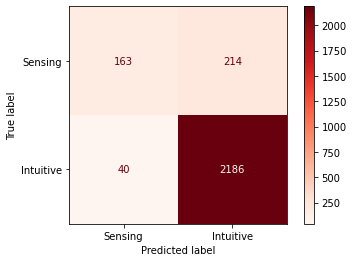

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
energy_model.fit(X_train, y_train)
plot_confusion_matrix(energy_model,X_test,y_test,cmap=plt.cm.Reds,values_format = '.5g', display_labels = ["Sensing","Intuitive"])
plt.show()

In [72]:
# Nature model
nature_df = train[['lemma','T']]

In [73]:
vect_nature = TfidfVectorizer(lowercase=True, 
                            stop_words='english', 
                            max_features=3900,
                            min_df=4,
                            max_df=0.5
                           )
vect_nature.fit(nature_df['lemma'])
X_count_nature = vect_nature.transform(nature_df['lemma'])

X_count_nature.shape

vect_nature.get_feature_names()

['ability',
 'able',
 'absolute',
 'absolutely',
 'absorbed',
 'abstract',
 'absurd',
 'abuse',
 'abusive',
 'academic',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidentally',
 'accomplish',
 'accomplished',
 'according',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'accused',
 'achieve',
 'achievement',
 'acknowledge',
 'acquaintance',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'actively',
 'activity',
 'actor',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'added',
 'addicted',
 'addiction',
 'adding',
 'addition',
 'address',
 'adhd',
 'admire',
 'admit',
 'admittedly',
 'adorable',
 'adore',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'adventurous',
 'advice',
 'advise',
 'advocate',
 'aesthetic',
 'affect',
 'affected',
 'affection',
 'affectionate',
 'affirmation',
 'afford',
 'afraid',
 'afternoon',
 'age',
 'agenda',
 'aggressive',
 'agnostic',
 'ago',
 'agree',
 'agreed',
 'a

In [74]:
X = X_count_nature
y = nature_df['T']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [75]:
best_nature_model = tune_LogReg_model(X_train, y_train)

c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [76]:
best_nature_model.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [77]:
nature_model = LogisticRegression(C=best_nature_model.best_params_['C'], penalty = best_nature_model.best_params_['penalty'])
nature_model.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [78]:
y_pred_train = nature_model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9015151515151515

In [79]:
y_pred_test = nature_model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8482520169035728

In [80]:
confusion_matrix(y_train, y_pred_train)

array([[2994,  284],
       [ 314, 2480]], dtype=int64)

In [81]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test, labels=[0,1])

array([[1226,  190],
       [ 205,  982]], dtype=int64)

In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3278
           1       0.90      0.89      0.89      2794

    accuracy                           0.90      6072
   macro avg       0.90      0.90      0.90      6072
weighted avg       0.90      0.90      0.90      6072



In [83]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1416
           1       0.84      0.83      0.83      1187

    accuracy                           0.85      2603
   macro avg       0.85      0.85      0.85      2603
weighted avg       0.85      0.85      0.85      2603



In [84]:
log_loss(y_train, y_pred_train)

3.401583558930627

In [85]:
log_loss(y_test, y_pred_test)

5.241248021322112

In [86]:
nature_log_loss = cross_val_score(nature_model, X, y, scoring=score_log_loss,cv=4,)
print('Log Loss %2f' %(-1 * nature_log_loss.mean()))

nature_acc = cross_val_score(nature_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(nature_acc.mean()))

Log Loss 4.809612
Accuracy 0.860749


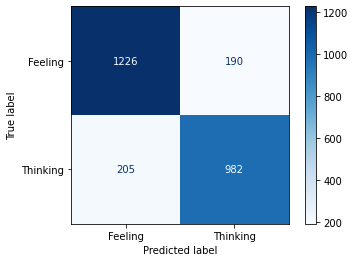

In [87]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
nature_model.fit(X_train, y_train)
plot_confusion_matrix(nature_model,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["Feeling","Thinking"])
plt.show()

In [88]:
# Tactics model
tactics_df = train[['lemma','J']]

In [89]:
vect_tactics = TfidfVectorizer(lowercase=True, 
                            stop_words='english', 
                            max_features=260,
                            min_df=4,
                            max_df=0.5
                           )
vect_tactics.fit(tactics_df['lemma'])
X_count_tactics = vect_tactics.transform(tactics_df['lemma'])

X_count_tactics.shape

vect_tactics.get_feature_names()

['able',
 'absolutely',
 'act',
 'advice',
 'age',
 'ago',
 'agree',
 'answer',
 'arent',
 'ask',
 'away',
 'awesome',
 'bad',
 'based',
 'believe',
 'big',
 'bit',
 'book',
 'called',
 'came',
 'care',
 'case',
 'cause',
 'certain',
 'change',
 'character',
 'child',
 'class',
 'close',
 'college',
 'common',
 'completely',
 'consider',
 'conversation',
 'cool',
 'couple',
 'course',
 'crazy',
 'dad',
 'deal',
 'definitely',
 'depends',
 'description',
 'difference',
 'difficult',
 'dream',
 'easy',
 'emotion',
 'emotional',
 'end',
 'enfj',
 'enfp',
 'enfps',
 'enjoy',
 'entj',
 'entp',
 'entps',
 'esfj',
 'esfp',
 'especially',
 'estp',
 'exactly',
 'example',
 'experience',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'favorite',
 'fe',
 'felt',
 'female',
 'fi',
 'figure',
 'fit',
 'forum',
 'fun',
 'function',
 'funny',
 'game',
 'general',
 'generally',
 'getting',
 'girl',
 'god',
 'great',
 'group',
 'guess',
 'haha',
 'hand',
 'happy',
 'hate',
 'havent',
 'having',
 'head',

In [90]:
X = X_count_tactics
y = tactics_df['J']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size =0.3,
                                                   random_state = 42)

In [91]:
best_tactics_model = tune_LogReg_model(X_train, y_train)

c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Parthasarathy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Parthasarat

In [92]:
best_tactics_model.best_params_

{'C': 0.75, 'penalty': 'l2'}

In [93]:
tactics_model = LogisticRegression(C=best_tactics_model.best_params_['C'], penalty = best_tactics_model.best_params_['penalty'])
tactics_model.fit(X_train, y_train)

LogisticRegression(C=0.75)

In [94]:
y_pred_train = tactics_model.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.8165349143610013

In [95]:
y_pred_test = tactics_model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.7990779869381482

In [96]:
from sklearn import metrics
metrics.confusion_matrix(y_train, y_pred_train, labels=[1,0])

array([[1656,  761],
       [ 353, 3302]], dtype=int64)

In [97]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test, labels=[0,1])
# confusion_matrix()

array([[1425,  161],
       [ 362,  655]], dtype=int64)

In [98]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      3655
           1       0.82      0.69      0.75      2417

    accuracy                           0.82      6072
   macro avg       0.82      0.79      0.80      6072
weighted avg       0.82      0.82      0.81      6072



In [99]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1586
           1       0.80      0.64      0.71      1017

    accuracy                           0.80      2603
   macro avg       0.80      0.77      0.78      2603
weighted avg       0.80      0.80      0.79      2603



In [100]:
log_loss(y_train, y_pred_train)

6.336706054318736

In [101]:
log_loss(y_test, y_pred_test)

6.9396499384266415

In [102]:
tactics_log_loss = cross_val_score(tactics_model, X, y, scoring=score_log_loss,cv=4,)
print('Log Loss %2f' %(-1 * tactics_log_loss.mean()))

tactics_acc = cross_val_score(tactics_model, X, y, scoring='accuracy',cv=4,)
print('Accuracy %2f' %(tactics_acc.mean()))

Log Loss 6.879968
Accuracy 0.800806


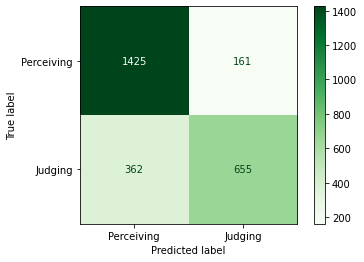

In [103]:
from sklearn.metrics import plot_confusion_matrix
tactics_model.fit(X_train, y_train)
plot_confusion_matrix(tactics_model,X_test,y_test,cmap=plt.cm.Greens,values_format = '.5g', display_labels = ["Perceiving","Judging"])
plt.show()

In [104]:
# Predicting on test data
test.head()

,username,description,lemma,stopwords,lemma_no_stop
0,_.anju.u,i used to make up songs all the time just beca...,i used to make up song all the time just becau...,62,used make song time wa fun also used...
1,__.tickled_pink.__,cant win unless you learn how to lose from the...,cant win unless you learn how to lose from the...,14,cant win unless learn lose theory interac...
2,_anugrahanair_,you do not find the happy life you make it som...,you do not find the happy life you make it som...,14,find happy life make sometimes better ...
3,_charuzz_,stop staring its our body womenempowerment gen...,stop staring it our body womenempowerment gend...,13,stop staring body womenempowerment genderequ...
4,_gaayu___,freedom lies in being bold be somebody that no...,freedom lie in being bold be somebody that nob...,10,freedom lie bold somebody nobady thought ...


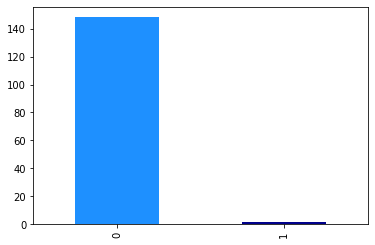

,username,E_pred
0,_.anju.u,0
1,__.tickled_pink.__,0
2,_anugrahanair_,0
3,_charuzz_,0
4,_gaayu___,0
5,_haripriyag_,0
6,_mariaknows_,0
7,_nina_abraham,0
8,_princess_cinderell___,0
9,_shifa_bilqis,0


In [105]:
# Predicting mind
pred_mind_count = vect_mind.transform(test['lemma_no_stop'])

pred_mind_count.shape

X = X_count_mind
y = mind_df['E']

final_mind_model = mind_model
final_mind_model.fit(X, y)

final_mind_predictions = final_mind_model.predict(pred_mind_count)

test['E_pred'] = final_mind_predictions

test.head()

pred_mind_df = test[['username', 'E_pred']]

pred_mind_df.head(10)

pred_mind_df.columns

pred_mind_df['E_pred'].value_counts().plot(kind = 'bar',color = ['dodgerblue','darkblue'])

#pred_mind_df

plt.show()

pred_mind_df.head(10)

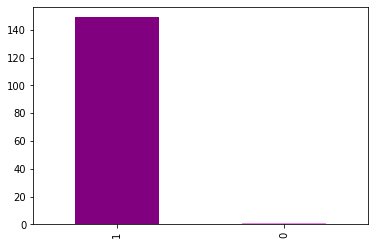

,username,N_pred
0,_.anju.u,1
1,__.tickled_pink.__,1
2,_anugrahanair_,1
3,_charuzz_,1
4,_gaayu___,1
5,_haripriyag_,1
6,_mariaknows_,1
7,_nina_abraham,1
8,_princess_cinderell___,1
9,_shifa_bilqis,1


In [106]:
# Predicting energy
pred_energy_count = vect_energy.transform(test['lemma_no_stop'])

pred_energy_count.shape

X = X_count_energy
y = energy_df['N']

final_energy_model = energy_model
final_energy_model.fit(X, y)

final_energy_predictions = final_energy_model.predict(pred_energy_count)

test['N_pred'] = final_energy_predictions

pred_energy_df = test[['username', 'N_pred']]

pred_energy_df['N_pred'].value_counts().plot(kind = 'bar', color = ['purple','violet'])
plt.show()

pred_energy_df.head(10)


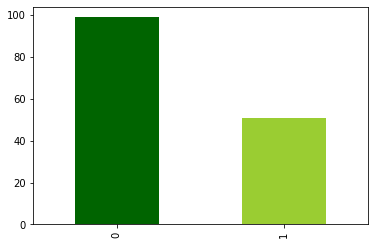

,username,T_pred
0,_.anju.u,1
1,__.tickled_pink.__,1
2,_anugrahanair_,0
3,_charuzz_,0
4,_gaayu___,0
5,_haripriyag_,0
6,_mariaknows_,0
7,_nina_abraham,0
8,_princess_cinderell___,0
9,_shifa_bilqis,1


In [107]:
# Predicting nature
pred_nature_count = vect_nature.transform(test['lemma_no_stop'])

pred_nature_count.shape

X = X_count_nature
y = nature_df['T']

final_nature_model = nature_model
final_nature_model.fit(X, y)

final_nature_predictions = final_nature_model.predict(pred_nature_count)

test['T_pred'] = final_nature_predictions

pred_nature_df = test[['username', 'T_pred']]

pred_nature_df['T_pred'].value_counts().plot(kind = 'bar', color = ['darkgreen','yellowgreen'])
plt.show()

pred_nature_df.head(10)


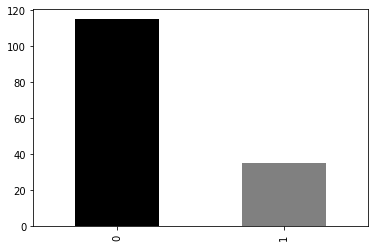

,username,J_pred
0,_.anju.u,0
1,__.tickled_pink.__,0
2,_anugrahanair_,0
3,_charuzz_,0
4,_gaayu___,0
5,_haripriyag_,0
6,_mariaknows_,0
7,_nina_abraham,0
8,_princess_cinderell___,0
9,_shifa_bilqis,0


In [108]:
# Predicting tactics
pred_tactics_count = vect_tactics.transform(test['lemma_no_stop'])

pred_tactics_count.shape

X = X_count_tactics
y = tactics_df['J']

final_tactics_model = tactics_model
final_tactics_model.fit(X, y)

final_tactics_predictions = final_tactics_model.predict(pred_tactics_count)

test['J_pred'] = final_tactics_predictions

pred_tactics_df = test[['username', 'J_pred']]

pred_tactics_df['J_pred'].value_counts().plot(kind = 'bar', color = ['black','grey'])

plt.show()

pred_tactics_df.head(10)


In [109]:
my_submission = pd.merge(pred_mind_df[['username','E_pred']], pred_energy_df[['username','N_pred']], how ='inner', on ='username') 
my_submission = pd.merge(my_submission[['username','E_pred', 'N_pred']], pred_nature_df[['username','T_pred']], how ='inner', on ='username')
my_submission = pd.merge(my_submission[['username','E_pred', 'N_pred','T_pred']], pred_tactics_df[['username','J_pred']], how ='inner', on ='username')

In [110]:
my_submission.head(10)

,username,E_pred,N_pred,T_pred,J_pred
0,_.anju.u,0,1,1,0
1,__.tickled_pink.__,0,1,1,0
2,_anugrahanair_,0,1,0,0
3,_charuzz_,0,1,0,0
4,_gaayu___,0,1,0,0
5,_haripriyag_,0,1,0,0
6,_mariaknows_,0,1,0,0
7,_nina_abraham,0,1,0,0
8,_princess_cinderell___,0,1,0,0
9,_shifa_bilqis,0,1,1,0


In [111]:
my_submission.rename(columns={'username':'username',
                            'E_pred':'mind',
                            'N_pred': 'energy',
                            'T_pred': 'nature',
                            'J_pred': 'tactics'
                             }, 
                 inplace=True)

my_submission

,username,mind,energy,nature,tactics
0,_.anju.u,0,1,1,0
1,__.tickled_pink.__,0,1,1,0
2,_anugrahanair_,0,1,0,0
3,_charuzz_,0,1,0,0
4,_gaayu___,0,1,0,0
...,...,...,...,...,...
145,wushu_luvr_shab,0,1,0,0
146,narendraprasath_np,0,1,1,0
147,teejayarunasalam,0,1,0,0
148,vickykaushal09,0,1,0,1


In [112]:
# Create column for the predictions of each of the 4 chracteristics
my_submission['Mind Pred'] = my_submission['mind'].map(lambda x: 'E' if x == 1 else 'I')
my_submission['Energy Pred'] = my_submission['energy'].map(lambda x: 'N' if x == 1 else 'S')
my_submission['Nature Pred'] = my_submission['nature'].map(lambda x: 'T' if x == 1 else 'F')
my_submission['Tactics Pred'] = my_submission['tactics'].map(lambda x: 'J' if x == 1 else 'P')

In [113]:
my_submission.head()

,username,mind,energy,nature,tactics,Mind Pred,Energy Pred,Nature Pred,Tactics Pred
0,_.anju.u,0,1,1,0,I,N,T,P
1,__.tickled_pink.__,0,1,1,0,I,N,T,P
2,_anugrahanair_,0,1,0,0,I,N,F,P
3,_charuzz_,0,1,0,0,I,N,F,P
4,_gaayu___,0,1,0,0,I,N,F,P


In [114]:
my_submission['Personality Pred'] = my_submission['Mind Pred'] + my_submission['Energy Pred'] + my_submission['Nature Pred']+ my_submission['Tactics Pred']

In [115]:
my_submission[['username','Personality Pred']]


,username,Personality Pred
0,_.anju.u,INTP
1,__.tickled_pink.__,INTP
2,_anugrahanair_,INFP
3,_charuzz_,INFP
4,_gaayu___,INFP
...,...,...
145,wushu_luvr_shab,INFP
146,narendraprasath_np,INTP
147,teejayarunasalam,INFP
148,vickykaushal09,INFJ


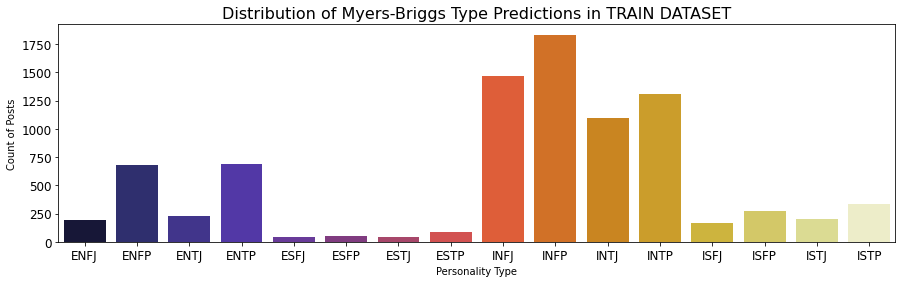

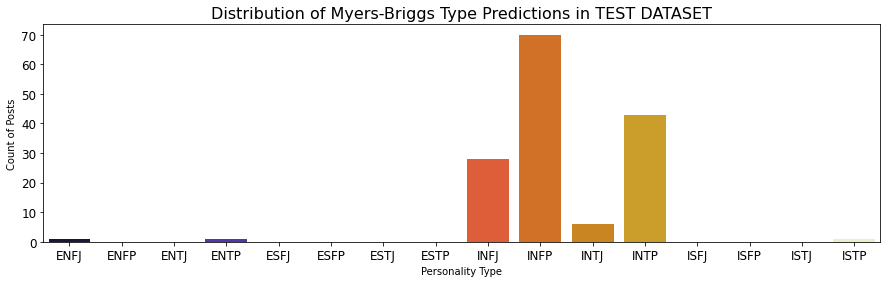

In [116]:
#view posts count of each personality type
# Countplot of the 16 personality types in the dataset
dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
cmrmap = sns.color_palette('CMRmap', 16)
sns.set_palette(cmrmap)
sns.countplot(x='type', data=train,\
              order=['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',\
                    'INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP'])
plt.title('Distribution of Myers-Briggs Type Predictions in TRAIN DATASET', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count of Posts')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



#view posts count of each personality type
# Countplot of the 16 personality types in the dataset
dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
cmrmap = sns.color_palette("CMRmap", 16)
sns.set_palette(cmrmap)
sns.countplot(x='Personality Pred', data=my_submission,\
              order=['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',\
                    'INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP'])
plt.title('Distribution of Myers-Briggs Type Predictions in TEST DATASET', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count of Posts')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()